<a href="https://colab.research.google.com/github/alefonsecabb/Descriptive-Data-Analysis/blob/main/Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

# Histogramas, cálculos e avaliações de medidas de tendência central, medidas separatrizes e de dispersão dos dados.



# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
classes = [
    df.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    df.Renda.max()
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [ ]:
frequencia = pd.value_counts(
    pd.cut(
        x = df.Renda,
        bins = classes,
        labels = labels,
        include_lowest = True)
)
frequencia

<ipython-input-6-f1d5c421b7d2>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(


,count
Renda,
E,49755
D,18602
C,7241
B,822
A,420


### 4º Construir a coluna de percentuais

In [ ]:
percentual = pd.value_counts(
    pd.cut(
        x = df.Renda,
        bins = classes,
        labels = labels,
        include_lowest = True
          )
)
percentual = percentual / percentual.sum() * 100
percentual

<ipython-input-7-3e0ac0826407>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


,count
Renda,
E,64.751432
D,24.208745
C,9.423477
B,1.069755
A,0.546590


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
frequencia_percentual = pd.DataFrame(
    {'Frequência' : frequencia, 'Percentual' : percentual}
)
frequencia_percentual.sort_index(inplace = True, ascending = False)
frequencia_percentual


,Frequência,Percentual
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

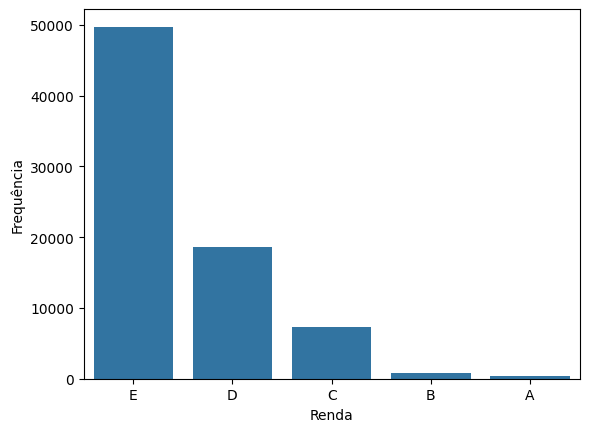

In [ ]:
ax = sns.barplot(
    x = frequencia_percentual.index,
    y = frequencia_percentual['Frequência']
)

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<ipython-input-10-c9954ee2e3e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.Renda)


Text(0, 0.5, 'Frequência')

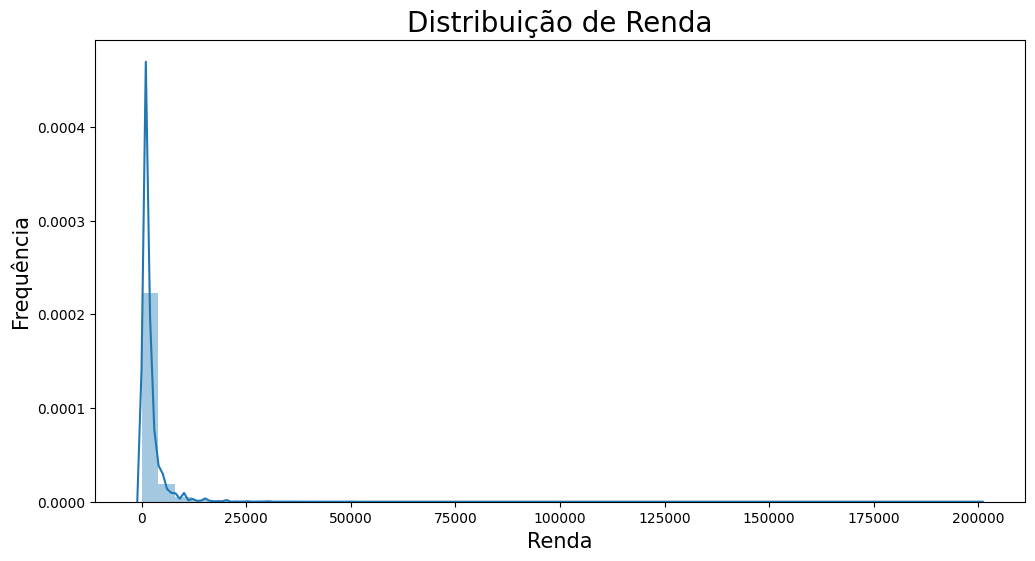

In [ ]:
ax = sns.distplot(df.Renda)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Renda', fontsize = 20)
ax.set_xlabel('Renda', fontsize = 15)
ax.set_ylabel('Frequência', fontsize = 15)

<ipython-input-11-396b94a44753>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.Altura)


Text(0, 0.5, 'Frequência')

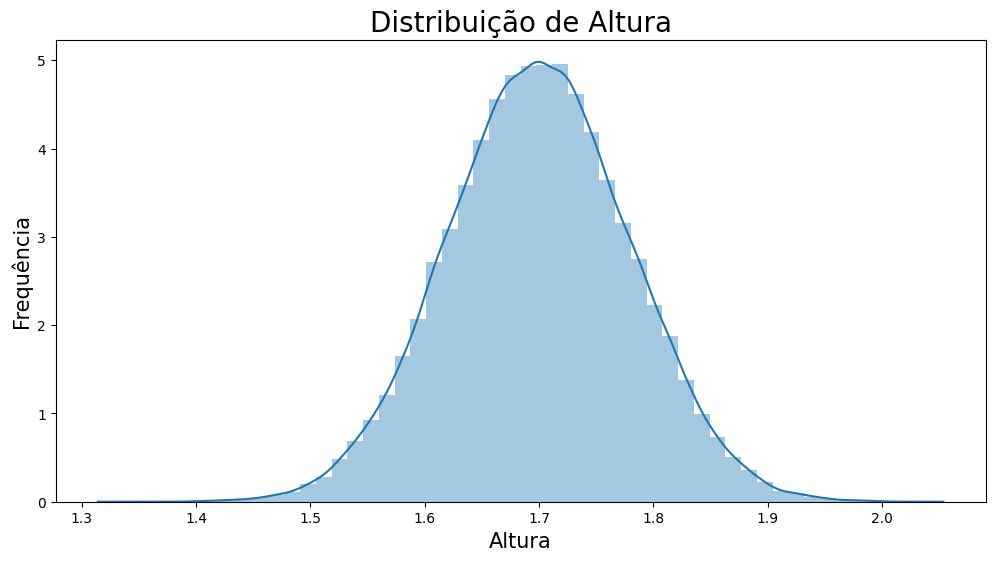

In [ ]:
ax = sns.distplot(df.Altura)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Altura', fontsize = 20)
ax.set_xlabel('Altura', fontsize = 15)
ax.set_ylabel('Frequência', fontsize = 15)

<ipython-input-12-8db4b286edc9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df.Idade)


Text(0, 0.5, 'Frequência')

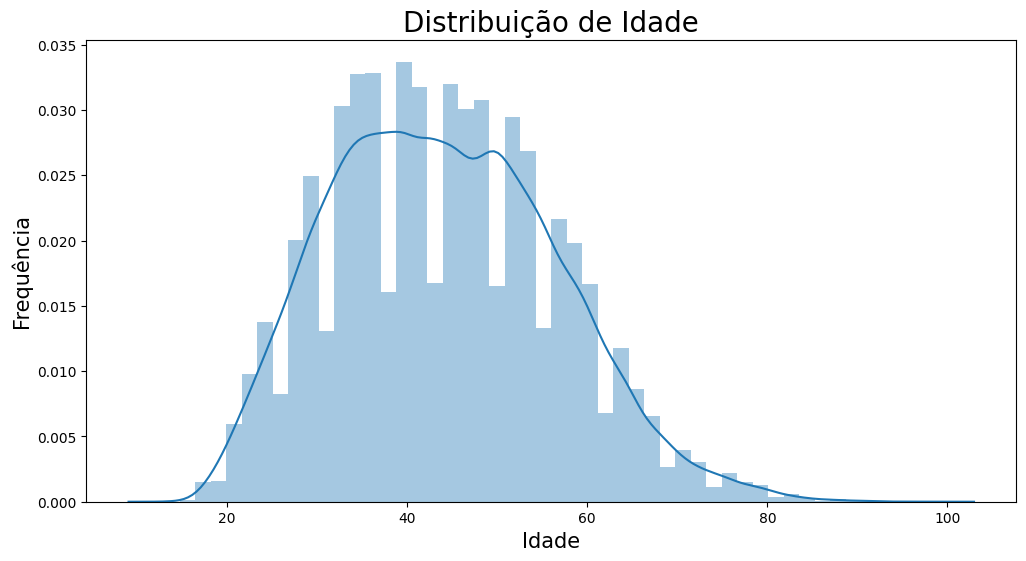

In [ ]:
ax = sns.distplot(df.Idade)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Idade', fontsize = 20)
ax.set_xlabel('Idade', fontsize = 15)
ax.set_ylabel('Frequência', fontsize = 15)

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

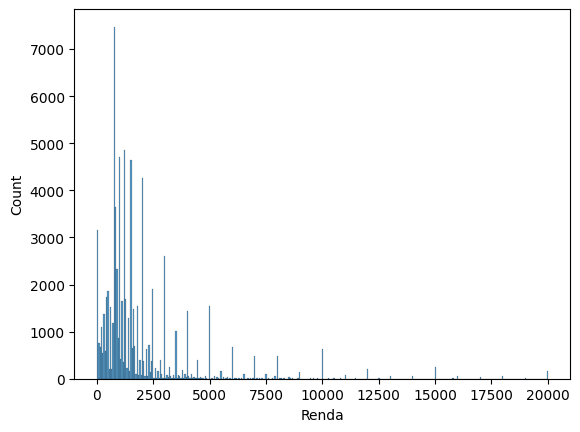

In [ ]:
ax = sns.histplot(
    data = df.query('Renda <= 20000'),
    x = 'Renda'
)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [ ]:
percentual_UF = pd.crosstab(df.Sexo,
                            df.UF,
                            )
percentual.rename(index = sexo, columns = cor, inplace = True)
#percentual.rename(columns = cor, inplace = True)
percentual

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Cor,,,,,,,,,,,,,,,,,,,,,
Indígena,0.003904,0.035138,0.075482,0.026028,0.057262,0.001301,0.000000,0.011713,0.001301,0.018220,...,0.006507,0.015617,0.035138,0.007808,0.006507,0.035138,0.009110,0.007808,0.006507,0.005206
Branca,0.640292,0.247267,0.446382,0.124935,1.028110,0.135346,0.406039,0.446382,0.303227,1.143935,...,0.834201,3.237897,6.568194,3.859969,2.511713,6.615044,0.831598,0.799063,1.669703,1.120510
Preta,0.214732,0.119729,0.160073,0.079386,0.606455,0.065070,0.213431,0.350078,0.196512,0.242061,...,0.235554,1.206403,0.917491,0.251171,0.067673,0.577824,0.106715,0.218636,0.425560,0.303227
Amarela,0.011713,0.002603,0.007808,0.001301,0.018220,0.003904,0.005206,0.001301,0.000000,0.015617,...,0.001301,0.024727,0.156169,0.068974,0.003904,0.011713,0.018220,0.010411,0.040344,0.015617
Parda,1.129620,0.814680,2.181156,0.471109,4.079906,0.460698,1.074961,1.516137,1.074961,2.951588,...,0.888860,2.745966,3.442218,1.480999,0.370901,0.987767,0.908381,1.306611,2.384175,1.228527


In [ ]:
percentual_UF = pd.crosstab(df.Sexo,
                            df.UF,
                            )
percentual_UF = percentual_UF.apply(lambda x: x/x.sum(), axis=1) # Convert to percentages if needed

# Rename index and columns using the dictionaries
percentual_UF.rename(index=sexo, columns=uf, inplace=True)

# Print the result
percentual_UF

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Sexo,,,,,,,,,,,,,,,,,,,,,
Masculino,0.021371,0.013108,0.028507,0.006648,0.059080,0.006197,0.017991,0.022479,0.016094,0.041822,...,0.020620,0.067944,0.110648,0.058761,0.032357,0.079737,0.018535,0.024338,0.048451,0.023531
Feminino,0.016914,0.010131,0.029165,0.007885,0.055235,0.007715,0.014752,0.025011,0.015006,0.047986,...,0.017507,0.082153,0.112421,0.052014,0.023400,0.088003,0.019203,0.021365,0.038067,0.033955


In [ ]:
percentual = pd.crosstab(df.Cor,
                         df.UF,
                        normalize = True) * 100
percentual.rename(index = cor, inplace = True)
percentual.rename(columns = uf, inplace = True)
percentual


UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Cor,,,,,,,,,,,,,,,,,,,,,
Indígena,0.003904,0.035138,0.075482,0.026028,0.057262,0.001301,0.000000,0.011713,0.001301,0.018220,...,0.006507,0.015617,0.035138,0.007808,0.006507,0.035138,0.009110,0.007808,0.006507,0.005206
Branca,0.640292,0.247267,0.446382,0.124935,1.028110,0.135346,0.406039,0.446382,0.303227,1.143935,...,0.834201,3.237897,6.568194,3.859969,2.511713,6.615044,0.831598,0.799063,1.669703,1.120510
Preta,0.214732,0.119729,0.160073,0.079386,0.606455,0.065070,0.213431,0.350078,0.196512,0.242061,...,0.235554,1.206403,0.917491,0.251171,0.067673,0.577824,0.106715,0.218636,0.425560,0.303227
Amarela,0.011713,0.002603,0.007808,0.001301,0.018220,0.003904,0.005206,0.001301,0.000000,0.015617,...,0.001301,0.024727,0.156169,0.068974,0.003904,0.011713,0.018220,0.010411,0.040344,0.015617
Parda,1.129620,0.814680,2.181156,0.471109,4.079906,0.460698,1.074961,1.516137,1.074961,2.951588,...,0.888860,2.745966,3.442218,1.480999,0.370901,0.987767,0.908381,1.306611,2.384175,1.228527


In [ ]:
percentual = pd.crosstab(df['Anos de Estudo'],
                         df.UF,
                        normalize = True) * 100
percentual.rename(index = anos_de_estudo, inplace = True)
percentual.rename(columns = uf, inplace = True)
percentual


UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Anos de Estudo,,,,,,,,,,,,,,,,,,,,,
Sem instrução e menos de 1 ano,0.153566,0.245966,0.235554,0.068974,0.511452,0.039042,0.160073,0.419053,0.316242,0.541385,...,0.122332,0.282405,0.413847,0.290213,0.101510,0.229047,0.100208,0.175690,0.269391,0.095003
1 ano,0.053358,0.023425,0.070276,0.013014,0.140552,0.010411,0.053358,0.111921,0.057262,0.135346,...,0.031234,0.057262,0.078084,0.039042,0.019521,0.093701,0.046851,0.036439,0.071577,0.015617
2 anos,0.071577,0.022124,0.093701,0.013014,0.221239,0.013014,0.057262,0.123634,0.096304,0.147059,...,0.049453,0.121031,0.132743,0.115825,0.041645,0.161374,0.065070,0.062467,0.118428,0.015617
3 anos,0.095003,0.044248,0.098907,0.022124,0.355284,0.022124,0.093701,0.098907,0.102811,0.188704,...,0.057262,0.176991,0.270692,0.178293,0.065070,0.279802,0.058563,0.081989,0.166580,0.041645
4 anos,0.226445,0.085893,0.179594,0.037741,0.463300,0.048152,0.114524,0.191307,0.200416,0.264185,...,0.242061,0.434669,0.890161,0.589537,0.363092,0.610359,0.184800,0.190005,0.380010,0.119729
5 anos,0.136648,0.046851,0.192608,0.027330,0.378709,0.027330,0.115825,0.130141,0.079386,0.239459,...,0.121031,0.365695,0.510151,0.295419,0.118428,0.786049,0.115825,0.149662,0.304529,0.095003
6 anos,0.071577,0.013014,0.095003,0.024727,0.209526,0.020822,0.050755,0.063769,0.044248,0.126236,...,0.050755,0.204321,0.308433,0.160073,0.057262,0.350078,0.080687,0.070276,0.193909,0.053358
7 anos,0.068974,0.032535,0.108017,0.024727,0.201718,0.018220,0.037741,0.080687,0.041645,0.148360,...,0.072879,0.235554,0.326653,0.161374,0.087194,0.292816,0.080687,0.068974,0.216033,0.071577
8 anos,0.225143,0.141853,0.269391,0.057262,0.653306,0.075482,0.167881,0.210828,0.104112,0.521864,...,0.213431,0.972150,1.203800,0.605154,0.442478,0.937012,0.190005,0.288912,0.502343,0.171786


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
df.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [ ]:
df.Renda.median()

1200.0

### Obtenha a moda

In [ ]:
df.Renda.mode()

,Renda
0,788


### Obtenha o desvio médio absoluto

In [ ]:
# Instead of df.Renda.mad(), use the following to calculate MAD:
(df.Renda - df.Renda.mean()).abs().mean()

# Explanation:
# 1. df.Renda.mean() calculates the mean of the 'Renda' column.
# 2. df.Renda - df.Renda.mean() calculates the difference between each value and the mean.
# 3. .abs() takes the absolute value of these differences.
# 4. .mean() calculates the average of these absolute differences, which is the MAD.

1526.4951371638058

### Obtenha a variância

In [ ]:
df.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [ ]:
df.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
renda_sexo_cor = pd.crosstab(df.Sexo,
                             df.Cor,
                             values = df.Renda,
                             aggfunc = {'mean', 'median', 'max'}
                            )
renda_sexo_cor.rename(index = sexo, inplace = True)
renda_sexo_cor.rename(columns = cor, inplace = True)
renda_sexo_cor

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
renda_sexo_cor = pd.crosstab(df.Sexo,
                             df.Cor,
                             values = df.Renda,
                             aggfunc = {'var', 'std'}
                            )
renda_sexo_cor.rename(index = sexo, inplace = True)
renda_sexo_cor.rename(columns = cor, inplace = True)
renda_sexo_cor

std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda por Sexo e Cor'}, xlabel='Renda', ylabel='Cor'>

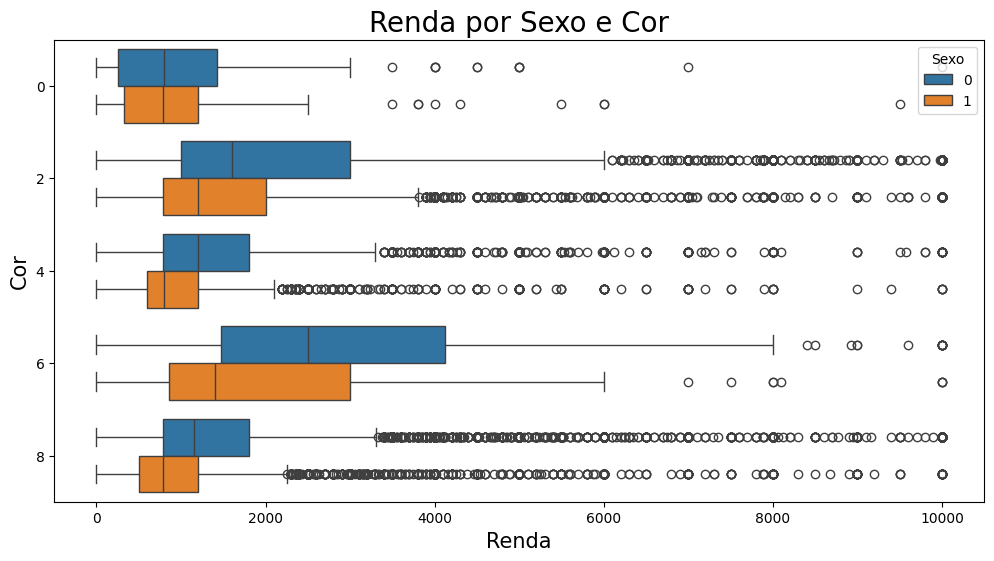

In [ ]:
ax = sns.boxplot(
    data = df.query('Renda <= 10000'),
    x = 'Renda',
    y = 'Cor',
    hue = 'Sexo',
    orient = 'h'
    )
ax.figure.set_size_inches(12, 6)
ax.set_title('Renda por Sexo e Cor', fontsize = 20)
ax.set_xlabel('Renda', fontsize = 15)
ax.set_ylabel('Cor', fontsize = 15)
ax

<ipython-input-54-40eef4f63f49>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y


<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

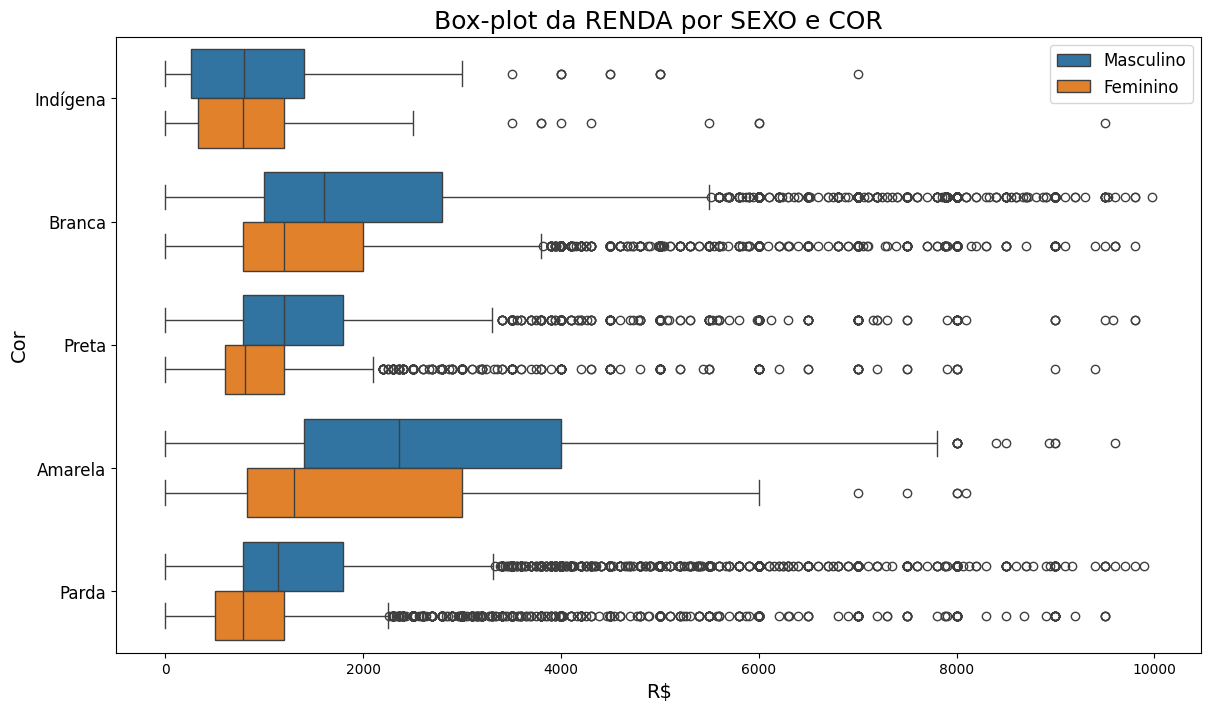

In [ ]:
# versão professor
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=df.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax


> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

renda = df.Renda.dropna()
percentual = stats.percentileofscore(df.Renda, 788, kind = 'weak')
percentual



28.867777199375325

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
valor_maximo = df.Renda.quantile(.99)
valor_maximo
print(f'99% das pessoas ganham no máximo R$ {valor_maximo:.2f}')

99% das pessoas ganham no máximo R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
renda_sexo_cor = pd.crosstab(df['Anos de Estudo'],
                             df.Sexo,
                             values = df.Renda,
                             aggfunc = {'mean', 'median', 'max', 'std'}
                            )
renda_sexo_cor.rename(index = anos_de_estudo, inplace = True)
renda_sexo_cor.rename(columns = sexo, inplace = True)
renda_sexo_cor

max                  mean               \
Sexo                           Masculino Feminino    Masculino     Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano     30000    10000   799.494638   516.201748   
1 ano                              30000     2000   895.629047   492.771987   
2 anos                             40000     4000   931.178986   529.911638   
3 anos                             80000     3500  1109.203862   546.853916   
4 anos                             50000    10000  1302.329283   704.279111   
5 anos                             35000     8000  1338.653218   781.389776   
6 anos                             25000     6000  1448.875419   833.732824   
7 anos                             40000     9000  1465.497940   830.751004   
8 anos                             30000    18000  1639.396667   933.615351   
9 anos                             60000    20000  1508.038850   868.021700   
10 anos                            45000     6000  1731.270847   925.919225   
11 anos                           200000   100000  2117.060504  1286.790889   
12 anos                            30000   120000  2470.330776  1682.313725   
13 anos                            25000    20000  3195.099154  1911.730047   
14 anos                            50000    20000  3706.620269  2226.460457   
15 anos ou mais                   200000   100000  6134.279790  3899.513231   
Não determinados                    7000     3000  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda por Anos de Estudo e Sexo'}, xlabel='Renda', ylabel='Anos de Estudo'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


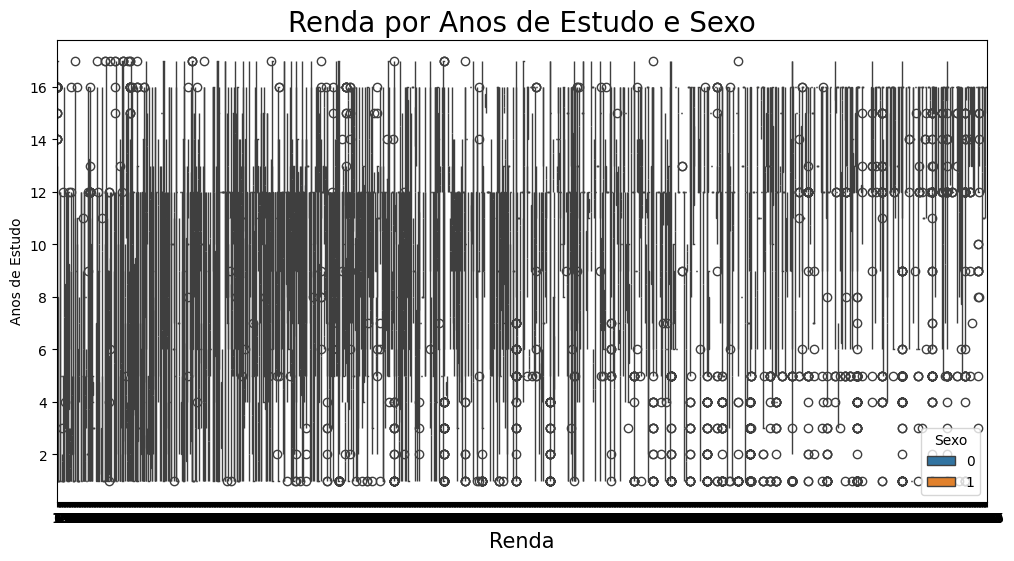

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=df.query('Renda < 10000'))
ax.figure.set_size_inches(12, 6)
ax.set_title('Renda por Anos de Estudo e Sexo', fontsize = 20)
ax.set_xlabel('Renda', fontsize = 15)
ax

<ipython-input-68-40c1e3cb785f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y


<Axes: title={'center': 'Box-plot da RENDA por SEXO e ANOS DE ESTUDO'}, xlabel='R$', ylabel='Anos de Estudo'>

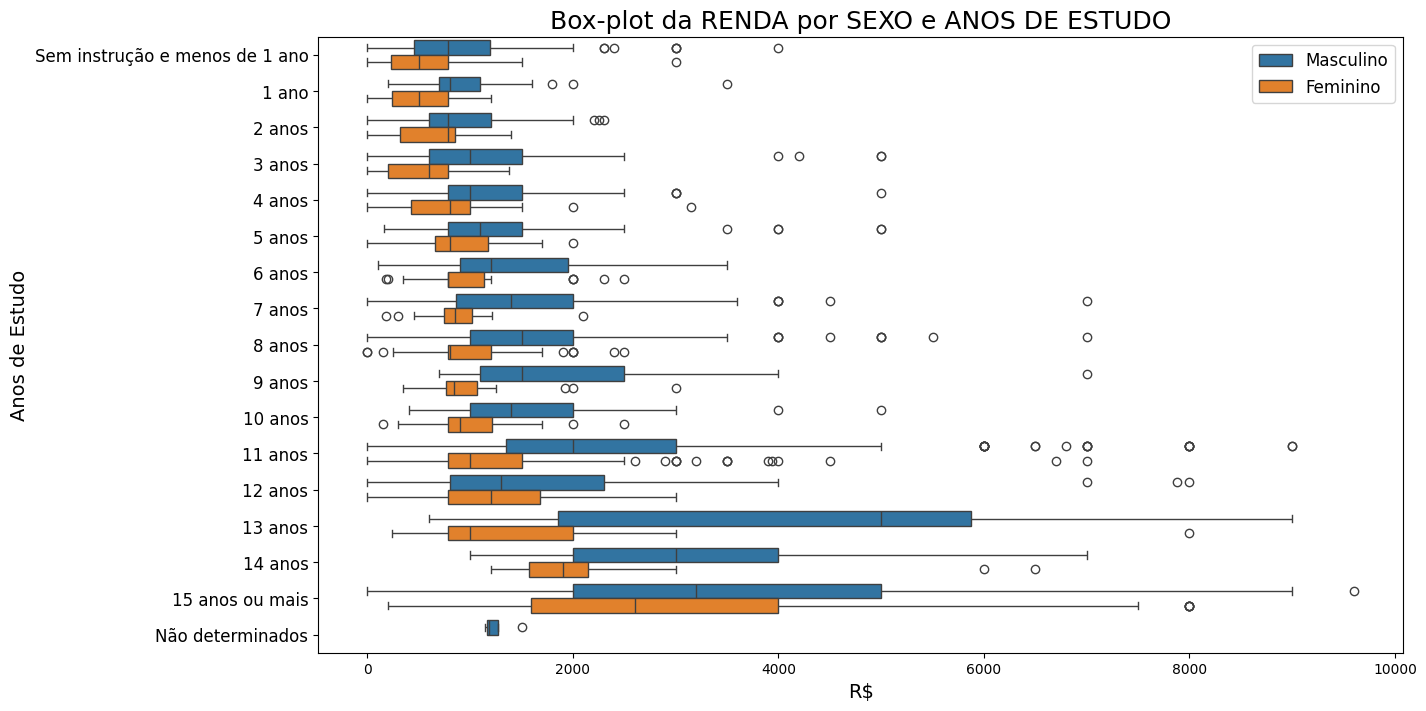

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=df.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
df.rename(columns = uf, inplace = True)
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
Sem instrução e menos de 1 ano,11,1,23,2,12,1150,1.739790
1 ano,11,1,35,8,15,880,1.760444
2 anos,11,0,46,2,6,3500,1.783158
3 anos,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<ipython-input-74-46ca2d3b50b5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y


<Axes: title={'center': 'Box-plot da RENDA por ESTADOS'}, xlabel='R$', ylabel='Estados'>

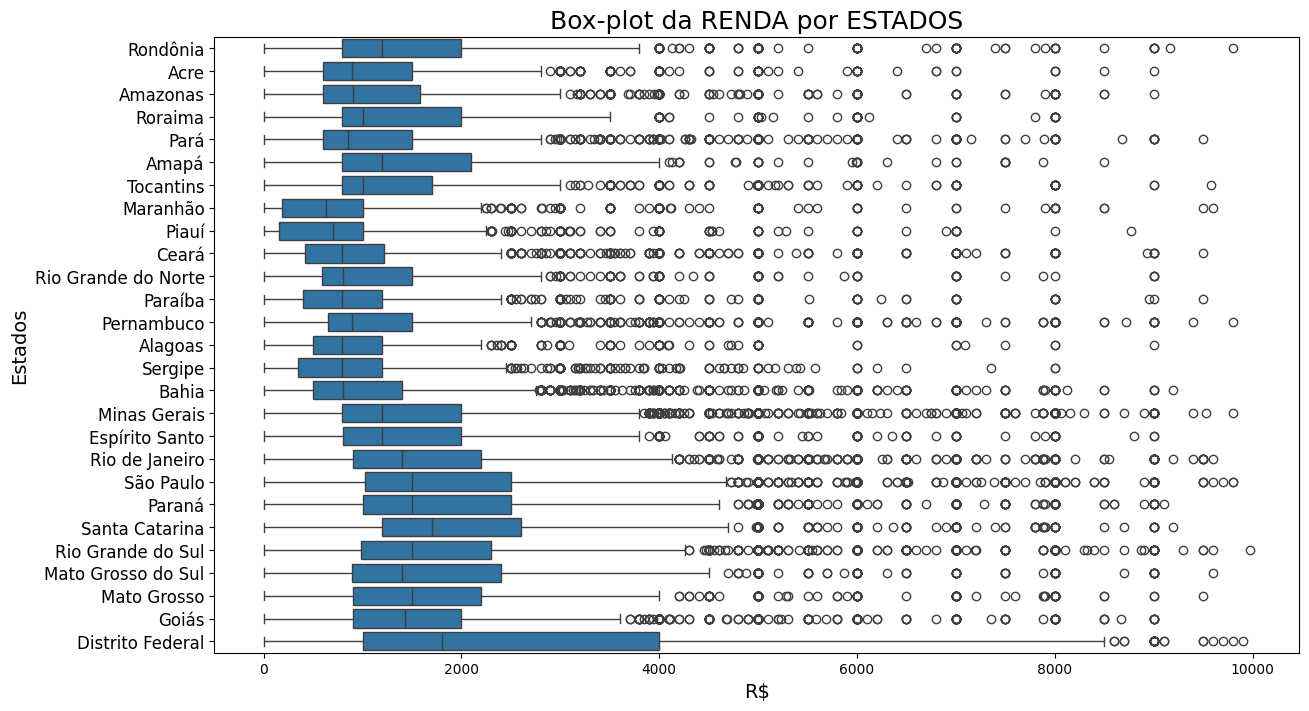

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=df.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax

> ### Conclusões

Escreva suas conclusões aqui...